In [131]:
from pydataset import data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import env

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [2]:
# Is there a difference in grades of students on the second floor 
# compared to grades of all students?

# two-tailed one-sample t-test.

In [3]:
# Are adults who drink milk taller than adults who dont drink milk?

# one tailed, two sample t-test.

In [4]:
# Is the the price of gas higher in texas or in new mexico?

# one-tailed two sample samples t-test

In [5]:
# Are there differences in stress levels between students who take
# data science vs students who take web development vs 
# students who take cloud academy?



# ANOVA Analysis of Variance

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [6]:
mean1 = 90 
std1 = 15 
sample1 = 50

#Office 2
mean2 = 100 
std2 = 20 
sample2 = 50

α = .05

In [7]:
null_hypo = 'There is no significant change in averge time to sell homes between the two offices'
alt_hypo = 'There is a difference in the average time it takes to sell a home between each office'
confidence_level = .95
α = 1 - confidence_level

In [8]:
from scipy.stats import ttest_ind_from_stats
t, p = ttest_ind_from_stats(mean1, std1, sample1, mean2, std2, sample2)
t, p

(-2.82842712474619, 0.005673017820622928)

In [9]:
if (p/2) < α:
    print("Reject the null hypothesis")
else: 
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


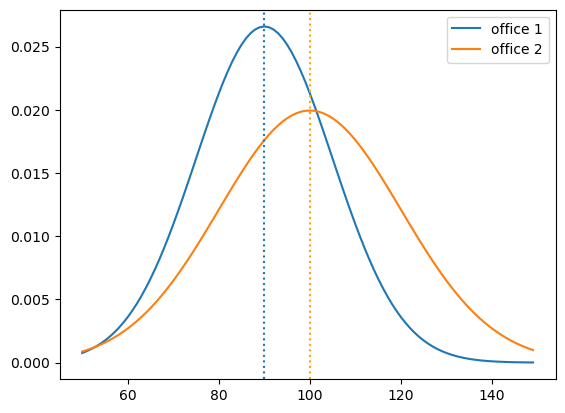

In [10]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

3. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [11]:
mpg = data('mpg')
mpg.head(3)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [12]:
#1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [13]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1) 

mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [14]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [15]:
α = 0.05
p < α
# fail to reject the null hypothesis that there is no difference 
# in fuel-efficency in cars from 2008 and 1999.

False

In [16]:
fe_1999.mean()

19.68238764869729

In [17]:
fe_2008.mean()

19.488662986569054

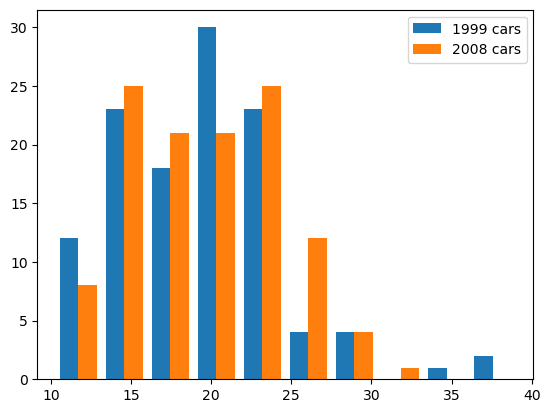

In [18]:
plt.hist([fe_1999, fe_2008], label=['1999 cars', '2008 cars'])
plt.legend()

In [19]:
#2. Are compact cars more fuel-efficient than the average car?

Hypo - there is a difference in fuel-efficiency between compact cars and the overall average


Null - there is no difference in fuel-efficiency between compact cars and the overall average

In [20]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [21]:
α = 0.05
p/2 < α

True

In [22]:
# we reject the null hypothesis that there is no difference in 
# fuel-efficiency between compact cars and the overall average.

In [23]:
#3. Do manual cars get better gas mileage than automatic cars?

hypo - there is a difference in gas mileage between manual and automatic cars


null - there is no difference in gas mileage between manual and automatic cars

In [24]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [25]:
p/2 < α and t > 0

True

In [26]:
# we reject the null hypothesis that there is no difference in gas
# mileage between manual and automatic cars

In [27]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')


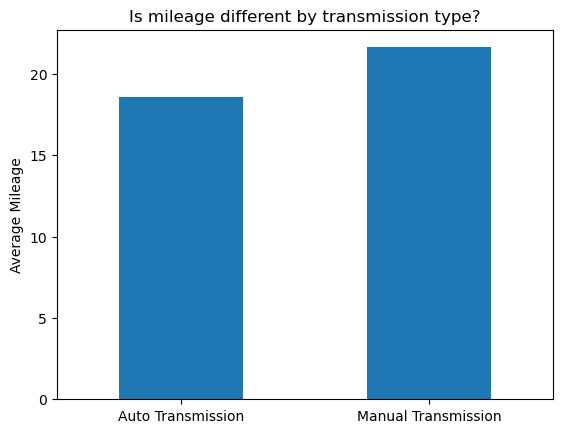

In [28]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average Mileage')
plt.title('Is mileage different by transmission type?')
plt.show()

1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
- Do guys and gals quit their jobs at the same rate?
- Does the length of time of the lecture correlate with a students grade?

In [29]:
# a. Pearson correlation test

# b. two-sample t-test would be appropriate

# c. simple linear regression analysis 

2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [30]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [31]:
sql_query = '''SELECT *
               FROM customers
               JOIN internet_service_types USING (internet_service_type_id)'''

In [32]:
df = pd.read_sql(sql_query, url)
df

,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,Fiber optic
3,2,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,Fiber optic
4,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,...,Yes,No,No,2,No,2,55.15,742.9,No,DSL
7039,2,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,...,No,No,Yes,1,Yes,1,85.10,1873.7,Yes,Fiber optic
7040,1,9992-UJOEL,Male,0,No,No,2,Yes,No,No,...,No,No,No,1,Yes,2,50.30,92.75,No,DSL
7041,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,...,Yes,No,Yes,3,No,2,67.85,4627.65,No,DSL


In [33]:
df = df[['tenure', 'monthly_charges', 'total_charges', 'internet_service_type', 'phone_service']]
df

,tenure,monthly_charges,total_charges,internet_service_type,phone_service
0,9,65.60,593.3,DSL,Yes
1,9,59.90,542.4,DSL,Yes
2,4,73.90,280.85,Fiber optic,Yes
3,13,98.00,1237.85,Fiber optic,Yes
4,3,83.90,267.4,Fiber optic,Yes
...,...,...,...,...,...
7038,13,55.15,742.9,DSL,Yes
7039,22,85.10,1873.7,Fiber optic,Yes
7040,2,50.30,92.75,DSL,Yes
7041,67,67.85,4627.65,DSL,Yes


## Does tenure correlate with monthly charges?

H$_0$ : There is no linear relationship between tenure and monthly charges

H$_a$: There is a linear relationship between tenure and monthly charges

In [74]:
df = pd.read_csv('telco_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [89]:
df_filtered = df[~np.isnan(df[['tenure', 'TotalCharges']]).any(axis=1)]


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

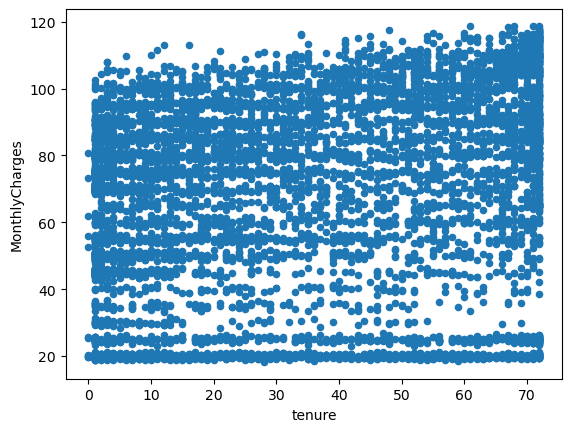

In [77]:
df.plot.scatter(y='MonthlyCharges', x='tenure')

In [82]:
alpha = 0.05
r, p = stats.pearsonr(df.tenure, df.MonthlyCharges)
r, p

(0.2478998562861525, 4.094044991483017e-99)

In [83]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [37]:
#  we reject the null hypothesis that there is no linear relationship between tenure and monthly charges

## Total charges?

H$_0$ : There is no linear relationship between tenure and total charges.

H$_a$ : There is a linear relationship between tenure and total charges.

In [57]:
print(df.dtypes)

tenure                     int64
monthly_charges          float64
total_charges             object
internet_service_type     object
phone_service             object
dtype: object


In [90]:
stats.pearsonr(df_filtered.tenure, df_filtered.TotalCharges)

PearsonRResult(statistic=0.8258804609332093, pvalue=0.0)

In [91]:
if p < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [ ]:
# we reject the null hypothesis where there is no linear relationship between tenure and total charges.

## Controlling for Phone and Internet Services

In [61]:
def corr_tenure_and_monthly(df):
    # returns the results of a pearson's r corr test run on the dataframe
    return pd.Series(stats.pearsonr(df.tenure, df.monthly_charges), index = ['r', 'p'])

In [62]:
df.groupby(['internet_service_type', 'phone_service']).apply(corr_tenure_and_monthly)


r              p
internet_service_type phone_service                         
DSL                   No             0.585760   4.603370e-64
                      Yes            0.655385  5.676203e-214
Fiber optic           Yes            0.624621   0.000000e+00
None                  Yes            0.342326   3.356187e-43

In [63]:
df.groupby(['phone_service']).apply(corr_tenure_and_monthly)


,r,p
phone_service,,
No,0.585760,4.603370e-64
Yes,0.245389,7.117871e-88


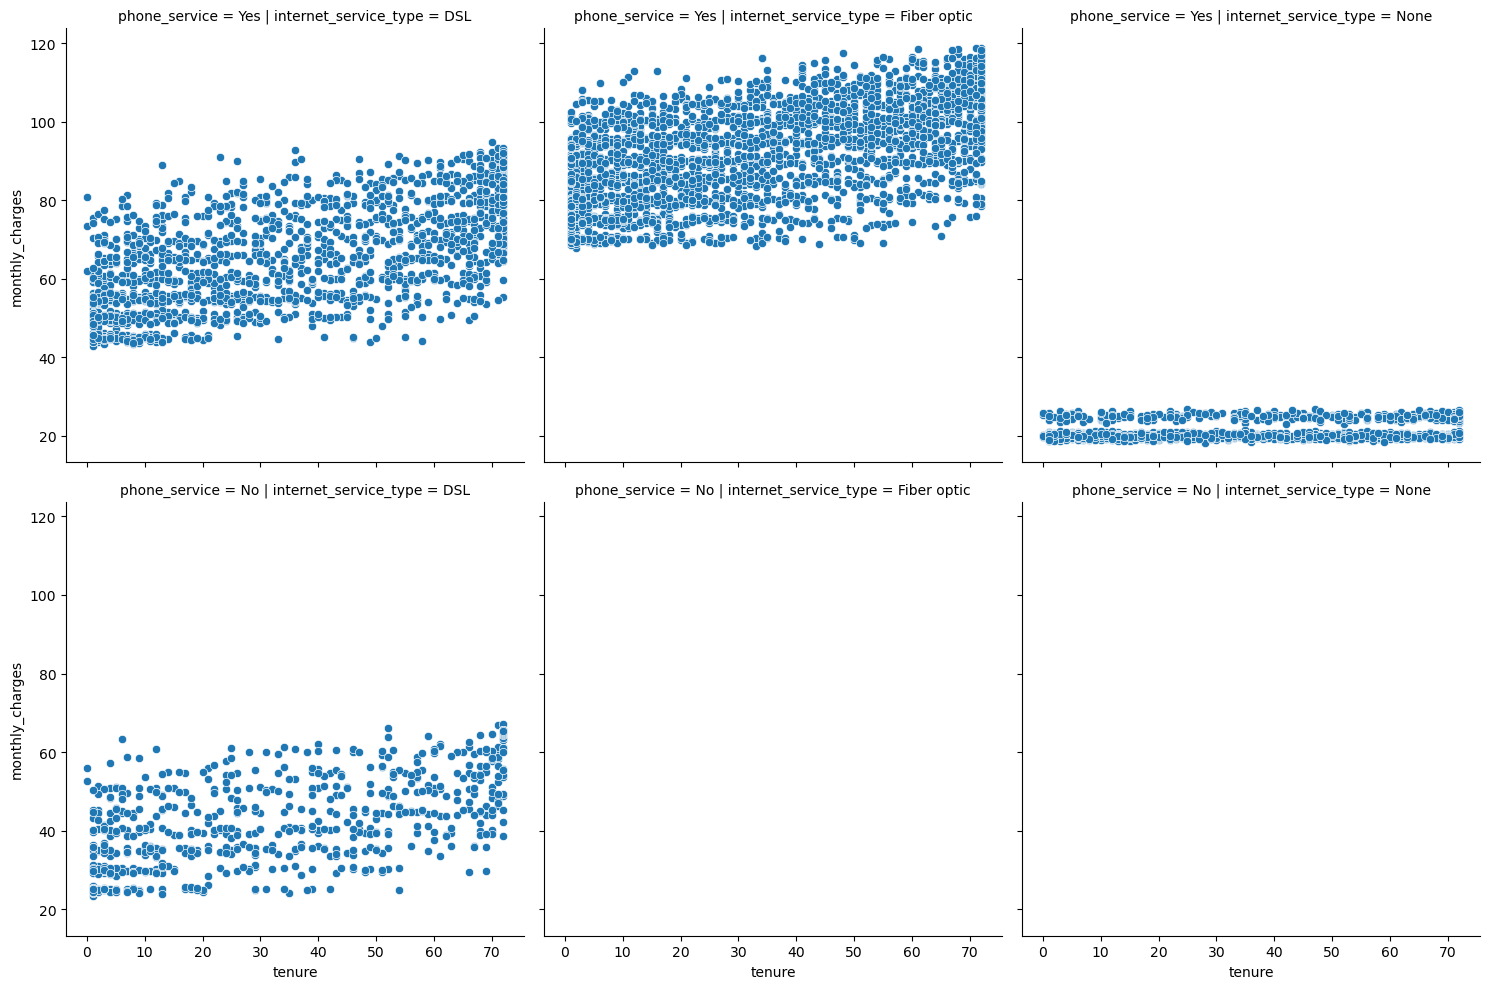

In [64]:
sns.relplot(data=df, y='monthly_charges', x='tenure', col='internet_service_type', row='phone_service')


In [92]:
stats.pearsonr(df_filtered.tenure, df_filtered.TotalCharges)

PearsonRResult(statistic=0.8258804609332093, pvalue=0.0)

3. Use the employees database.
- Is there a relationship between how long an employee has been with -- the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [103]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [121]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

In [122]:
ews = pd.read_sql(query, url)
ews

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692
...,...,...
240119,2572,52868
240120,3410,69501
240121,5030,83441
240122,2298,55003


H$_0$ : There is no linear relationship between employee tenure and their salary

H$_a$ : There is a linear relationship between employee tenure and their salary

## Is there a relationship between how long an employee has been with the company and their salary?

In [114]:
r, p = stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)
r, p

(0.3064625613186086, 0.0)

In [115]:
p < α

True

In [ ]:
# We can reject the null hypothesis that there is no linear relationship between employee tenure and their salary

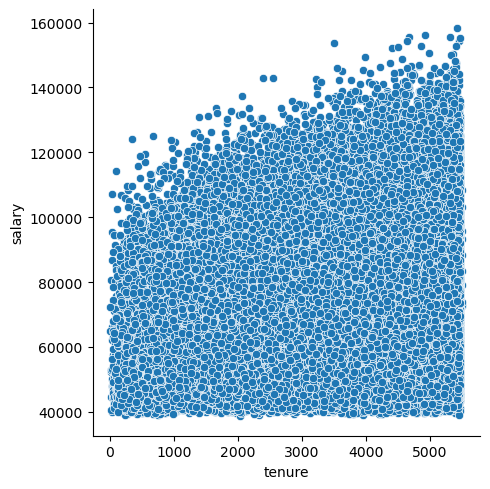

In [116]:
sns.relplot(data=employees_with_salaries, y='salary', x='tenure')


## Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [123]:
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

In [124]:
ewt = pd.read_sql(query, url)
ewt

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2
...,...,...,...
300019,499995,2572,1
300020,499996,3410,2
300021,499997,5030,2
300022,499998,2298,2


H$_0$ : There's no linear relationship between employee tenure and number of titles

H$_a$ : There's a linear relationship between employee tenure and number of titles

In [127]:
r, p = stats.pearsonr(ewt.tenure, ewt.n_titles)


In [128]:
p < α

True

In [129]:
# we can reject the null hypothesis that there's no linear relationship between employee tenure and number of titles



## 4.Use the sleepstudy data.
- Is there a relationship between days and reaction time?



In [132]:
sleep = data('sleepstudy')
sleep.head()


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


H$_0$ : there is no linear relationship between reaction time and number of days

H$_a$ : there is a linear relationship between reaction time and number of days

In [134]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days) 
p < α
# We reject the null hypothesis where there is no linear relationship between reaction time and number of days


True

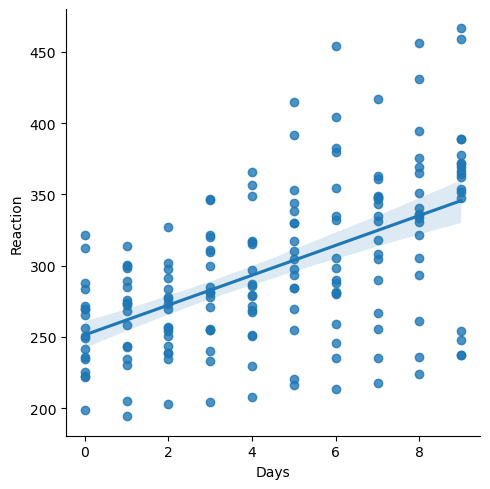

In [135]:
sns.lmplot(data=sleep, y='Reaction', x='Days')


# Comparison of groups Exercise

## 1. Answer with the type of stats test you would use (assume normal distribution):

- A. Do students get better test grades if they have a rubber duck on their desk?
- B.Does smoking affect when or not someone has lung cancer?
- C. Is gender independent of a person’s blood type?
- D. A farming company wants to know if a new fertilizer has improved crop yield or not
- E. Does the length of time of the lecture correlate with a students grade?
- F. Do people with dogs live in apartments more than people with cats?


In [ ]:
'''
A. One-sample t-test or independent samples t-test (depending on whether the grades of students with and without rubber ducks are compared).
B. Chi-square test or logistic regression analysis.
C. Chi-square test or contingency table analysis.
D. Two-sample t-test or ANOVA (depending on the number of groups being compared).
E. Pearson correlation coefficient or Spearman correlation coefficient.
F. Chi-square test or logistic regression analysis.
'''

## 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                
                            Codeup Student Not Codeup Student
            Uses a Macbook 	49	         20
    Doesn't Use A Macbook	  1              30

H$_0$ : there is no association between being a codeup student and using a macbook

H$_a$ : there is a association between being a codeup student and using a macbook

In [137]:
α = 0.05

In [138]:
observed = [[49,20],[1,30]]
observed

[[49, 20], [1, 30]]

In [139]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [140]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [144]:
chi2, p

(36.65264142122487, 1.4116760526193828e-09)

In [146]:
p < α

# We reject the null hypotheses that there is no association between being a codeup student and using a macbook

True

## 2. Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [147]:
from pydataset import data

In [148]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


H$_0$ : there is no association between cylinder and highway mileage

H$_a$ : there is a association between cylinder and highway mileage

In [151]:
observed = pd.crosstab(mpg.hwy, mpg.cyl)
observed

cyl,4,5,6,8
hwy,,,,
12,0,0,0,5
14,0,0,0,2
15,0,0,0,10
16,0,0,0,7
17,0,0,13,18
18,0,0,2,8
19,0,0,7,6
20,4,0,4,3
21,0,0,1,1


In [153]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [154]:
chi2, p

(240.98031704463634, 1.554675371190263e-18)

In [156]:
p < α

# we reject the null hypothesis that there is no association between cylinder and highway mileage

True

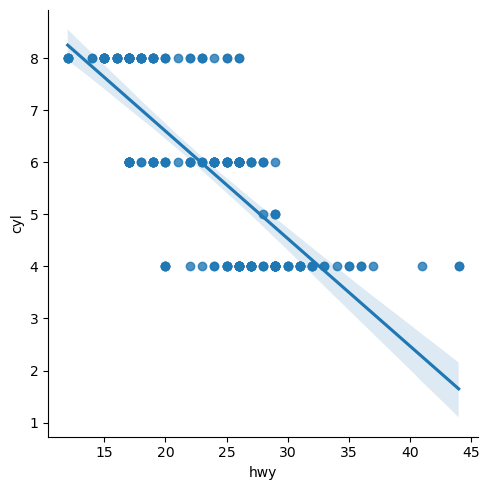

In [159]:
sns.lmplot(data=mpg, y='cyl', x='hwy')

## 4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

### Is an employee's gender independent of whether an employee works in sales or marketing?

In [161]:
query = ''' 
        select emp_no, gender, dept_name
        from employees
            join dept_emp
                using (emp_no)
            join departments
                using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')'''

In [162]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

H$_0$ : there is no association between gender and the department

H$_a$ : there is an association between gender and the department

In [163]:
ewg= pd.read_sql(query, url)
ewg

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [165]:
observed = pd.crosstab(ewg.gender, ewg.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [166]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [167]:
chi2, p

(0.3240332004060638, 0.5691938610810126)

In [168]:
p < α

False

In [ ]:
# we fail to reject the null hypothesis that there is no association between gender and the department

### Is an employee's gender independent of whether or not they are or have been a manager?

H$_0$ : there is no association between being a persons gender and being a manager

H$_a$ : there is a association between being a persons gender and being a manager

In [171]:
query = '''
        select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)
        '''

In [172]:
ewm = pd.read_sql(query, url)
ewm

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [174]:
ewm.dept_no = ewm.dept_no.fillna('not manager')

In [177]:
ewm.dept_no = np.where( ewm.dept_no != 'not manager', 
                      'manager', 'not manager')

In [178]:
observed = pd.crosstab(ewm.gender, ewm.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [179]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(1.4566857643547197, 0.22745818732810363)

In [180]:
p < α

False

In [ ]:
# we fail to reject the null hypothesis that there is no association between being a persons gender and being a manager